# Fundamentals of fMRI data analysis 
## General Linear Model 1


In this assignment, your task is to complete a few linear regression excercises in Python.

You can choose to answer in Polish or English (it will not affect your grade).

**DEADLINE:** 31-12-2020

-------------------

## Linear regression analysis with signals of non-neuronal origin

*Confounds* (or nuisance regressors) are variables representing fluctuations with a potential non-neuronal origin. Such non-neuronal fluctuations may drive spurious results in fMRI data analysis, including standard activation GLM and functional connectivity analyses. Read [more](https://fmriprep.readthedocs.io/en/stable/outputs.html#confounds).

Run simple and multiple linear regression to investigate associations between regressors.

Confounds regressors calculated with *fMRIPrep* are stored in data folder (`/data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv`)

### Task 1

Investigate linear relationship between *global signal* (signal from the whole brain) and signal from *white matter*.

In [11]:
# Load libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.image as mpimg

In [5]:
# Load DataFrame with confounds

conf_path = "C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/sub-01_task-rhymejudgment_desc-confounds_regressors.tsv"
conf = pd.read_csv(conf_path, delimiter="\t")

# Print all column names (use df.columns.values)

print(conf.columns.values)

['csf' 'csf_derivative1' 'csf_power2' 'csf_derivative1_power2'
 'white_matter' 'white_matter_derivative1'
 'white_matter_derivative1_power2' 'white_matter_power2' 'global_signal'
 'global_signal_derivative1' 'global_signal_derivative1_power2'
 'global_signal_power2' 'std_dvars' 'dvars' 'framewise_displacement'
 't_comp_cor_00' 't_comp_cor_01' 't_comp_cor_02' 't_comp_cor_03'
 't_comp_cor_04' 't_comp_cor_05' 'a_comp_cor_00' 'a_comp_cor_01'
 'a_comp_cor_02' 'a_comp_cor_03' 'a_comp_cor_04' 'a_comp_cor_05'
 'a_comp_cor_06' 'a_comp_cor_07' 'a_comp_cor_08' 'a_comp_cor_09'
 'a_comp_cor_10' 'a_comp_cor_11' 'a_comp_cor_12' 'a_comp_cor_13'
 'a_comp_cor_14' 'a_comp_cor_15' 'a_comp_cor_16' 'a_comp_cor_17'
 'a_comp_cor_18' 'a_comp_cor_19' 'a_comp_cor_20' 'a_comp_cor_21'
 'a_comp_cor_22' 'a_comp_cor_23' 'a_comp_cor_24' 'a_comp_cor_25'
 'a_comp_cor_26' 'a_comp_cor_27' 'a_comp_cor_28' 'a_comp_cor_29'
 'a_comp_cor_30' 'a_comp_cor_31' 'a_comp_cor_32' 'a_comp_cor_33'
 'a_comp_cor_34' 'a_comp_cor_35' 'a_co

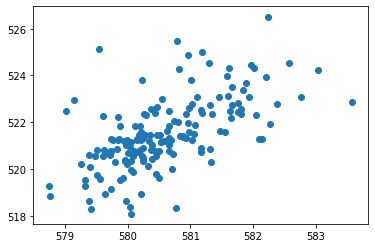

In [6]:
# Select columns representing global signal and white matter signal
global_signal = conf[["global_signal"]]
white_matter = conf[["white_matter"]]

# Plot association between these signals using on scatterplot
wm = conf['white_matter'].values
gs = conf['global_signal'].values
plt.scatter(wm, gs)


In [7]:
# Run simple linear regression for global signal and white matter signal
linear_regression = LinearRegression() 
linear_regression.fit(wm.reshape(-1, 1), gs.reshape(-1, 1))

# Print intercept and beta values
intercept = linear_regression.intercept_
beta = linear_regression.coef_
print("Beta:", beta)
print("Intercept:", intercept)


Beta: [[1.06350464]]
Intercept: [-95.93981294]


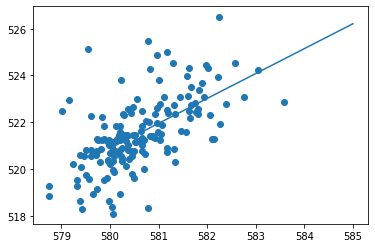

In [8]:
# Make a scatterplot representing association between signals with fitted linear regression line

x = np.linspace(580,585,100)
y = beta*x+intercept
y = np.squeeze(y)

plt.scatter(wm, gs)
plt.plot(x,y)

### Task 2

*Framewise displacement* variable in confounds table (stored as `framewise_displacement`) is a quantification of the estimated bulk-head motion. Run multiple linear regression to predict `framewise_displacement` from six motion parameters (3 rotations, 3 translations). Use previously loaded confounds table.


In [12]:
# Filter dataframe to store only 6 motion parameters
motion = conf[["trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z"]]

# Filter dataframe to store framewise displacement
framewise_displacement = conf[["framewise_displacement"]]


In [23]:
# Fit multiple linear regression model 
conf.dropna(subset=["framewise_displacement"], inplace=True)

linear_regression.fit(motion, framewise_displacement)

# Print intercept and beta values
print(linear_regression.coef_, linear_regression.intercept_)


[[-0.40116933 -0.15608601 -0.08604222 -3.47703684 -3.29403679  7.3812089 ]] [0.10217716]


Which of the 6 motion parameter values has highest corresponding beta value?

**Answer**: rot_z - 7.3812089

--------

## Linear regression on movie/TV series characters profile pictures

### Task 3

In folder `data/characters` you can find pictures of 5 characters from Harry Potter movie stored as 400$\times$400 numpy arrays (RED channel). 

Add your favourite movie/TV character from previous homework to the folder (array has to have the same dimension) and run multiple regression to predict your character from other other characters pictures. 

You can load more pictures to improve your prediction!!!


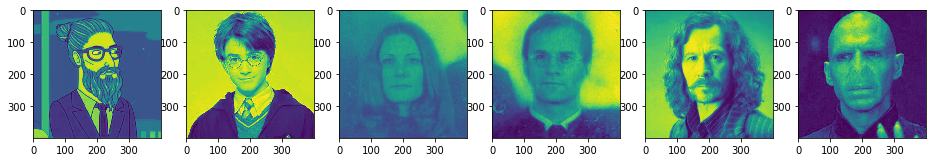

In [14]:
# Load image of your favoutite character
judah = mpimg.imread("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/judah.jpg")
red_judah = judah[:,:,0]

# Load pictures of other characters
harry = np.load("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/harry.npy")
lilly = np.load("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/lilly.npy")
james = np.load("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/james.npy")
syrius = np.load("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/syrius.npy")
voldemort = np.load("C:/Users/krzys/OneDrive/Pulpit/homework_3/03-homework-master/data/characters/voldemort.npy")

# Plot all pictures on a one figure (use plt.subplots)
characters = [red_judah, harry, lilly, james, syrius, voldemort]
fig, ax = plt.subplots(1,6, figsize = (16,30))

for i in range(len(characters)):
    ax[i].imshow(characters[i])


In [15]:
# Make a matrix of characters (remember to change matrices to vectors and transpose).
characters_matrix = []
for char in characters:
    characters_matrix.append(char.flatten())
characters_matrix = np.array(characters_matrix)
characters_matrix_trans = characters_matrix.T

# Fit multiple linear regression to predict your favourite character from other characters
linear_regression = LinearRegression()
linear_regression.fit(characters_matrix_trans[:,1:], characters_matrix_trans[:,0])

# Print intercept and beta values
betas = linear_regression.coef_
intercept = linear_regression.intercept_
print(betas, intercept)

[0.03003895 0.12990937 0.0215589  0.2411777  0.38580396] 20.953028355596345


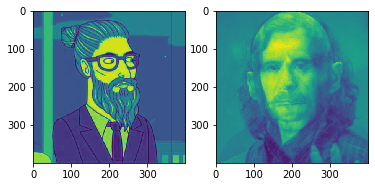

In [16]:
# Calculate your fitted character
predicted_judah = betas[0]*harry + betas[1]*lilly + betas[2]*james + betas[3]*syrius + betas[4]* voldemort + intercept

# Plot your original character and fitted character on a one plot (use plt.subplots)
fig, ax = plt.subplots(1,2)
ax[0].imshow(red_judah)
ax[1].imshow(predicted_judah)


Which of the characters has highest and lowest corresponding beta values?

**Highest**: Syriusz

**Lowest**: Harry